sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Region: us-east-1
Account: 638321960078
Datalake bucket: sagemaker-us-east-1-638321960078
Athena output: s3://sagemaker-us-east-1-638321960078/athena-results/
Using Kaggle CLI: /opt/conda/bin/kaggle
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0


100%|██████████| 42.6M/42.6M [00:01<00:00, 37.5MB/s]



Downloaded ZIP: /home/sagemaker-user/kaggle_download/brazilian-ecommerce.zip
CSV files found: 9
 - olist_customers_dataset.csv
 - olist_geolocation_dataset.csv
 - olist_order_items_dataset.csv
 - olist_order_payments_dataset.csv
 - olist_order_reviews_dataset.csv
 - olist_orders_dataset.csv
 - olist_products_dataset.csv
 - olist_sellers_dataset.csv
 - product_category_name_translation.csv
✅ Raw data found in S3. Skipping upload to prevent redundant costs.
Location: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/

Raw data lake prefix: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/


2026-01-30 19:57:08,729	WARNING services.py:2070 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 1909428224 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=4.18gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2026-01-30 19:57:08,866	INFO worker.py:1852 -- Started a local Ray instance.


Copied: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_customers_dataset.csv -> s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_customers_dataset/data.csv
Copied: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_geolocation_dataset.csv -> s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_geolocation_dataset/data.csv
Copied: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_order_items_dataset.csv -> s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_order_items_dataset/data.csv
Copied: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_order_payments_dataset.csv -> s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_order_payments_dataset/data.csv
Copied: s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_order_reviews_dataset.csv -> s3://sagemaker-us-east-1-638321960078/datalake/olist/raw/olist_order_reviews_dataset/data.csv
Copied: s3://sagemaker-us-east-1-63832196007

,missing_pct,column
order_delivered_customer_date,2.98,order_delivered_customer_date
order_delivered_carrier_date,1.79,order_delivered_carrier_date
order_approved_at,0.16,order_approved_at
order_id,0.00,order_id
order_purchase_timestamp,0.00,order_purchase_timestamp
order_status,0.00,order_status
customer_id,0.00,customer_id
order_estimated_delivery_date,0.00,order_estimated_delivery_date



items missingness (top 20):


,missing_pct,column
order_id,0.0,order_id
order_item_id,0.0,order_item_id
product_id,0.0,product_id
seller_id,0.0,seller_id
shipping_limit_date,0.0,shipping_limit_date
price,0.0,price
freight_value,0.0,freight_value



payments missingness (top 20):


,missing_pct,column
order_id,0.0,order_id
payment_sequential,0.0,payment_sequential
payment_type,0.0,payment_type
payment_installments,0.0,payment_installments
payment_value,0.0,payment_value



reviews missingness (top 20):


,missing_pct,column
review_comment_title,88.34,review_comment_title
review_comment_message,58.70,review_comment_message
review_id,0.00,review_id
review_score,0.00,review_score
order_id,0.00,order_id
review_creation_date,0.00,review_creation_date
review_answer_timestamp,0.00,review_answer_timestamp


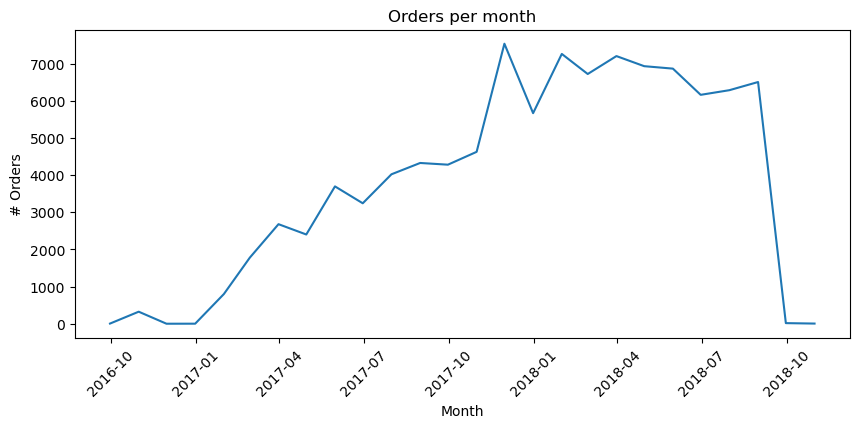

Engineered feature frame: (98673, 23)
Wrote features to: s3://sagemaker-us-east-1-638321960078/datalake/olist/features/order_level_features/
Created/updated Athena table: olist_order_level_features
Datetime columns: ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Feature Group: olist-order-features-v2
Offline store: s3://sagemaker-us-east-1-638321960078/feature-store/olist/olist-order-features-v2/
Role: arn:aws:iam::638321960078:role/LabRole
✅ Feature Group 'olist-order-features-v2' already exists. Skipping creation.
Submitting ingestion in 20 chunks of 5000 rows...
Submitted chunk 1/20: rows 0-4999
Submitted chunk 2/20: rows 5000-9999
Submitted chunk 3/20: rows 10000-14999
Submitted chunk 4/20: rows 15000-19999
Submitted chunk 5/20: rows 20000-24999
Submitted chunk 6/20: rows 25000-29999
Submitted chunk 7/20: rows 30000-34999
Submitted chunk 8/20: rows 35000-39999
Submitted chunk 9/20: rows 40000-44999
Submitted chunk

In [1]:
# If you're running this in SageMaker Studio:
# - Keep this notebook in the same folder as 01_Data_Preparation.ipynb
%run ./01_Data_Preparation.ipynb


In [2]:
#imports
import os
import io
import json
import time
import boto3
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import sagemaker
from sagemaker import image_uris
from sagemaker.inputs import TrainingInput
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# Session / region / role
sm_sess = sagemaker.Session()
region = sm_sess.boto_region_name
role = sagemaker.get_execution_role()

print("Region:", region)
print("Role  :", role)


Region: us-east-1
Role  : arn:aws:iam::638321960078:role/LabRole


In [4]:
# Check: make sure that these exist from Data_Preparation
assert "df_train" in globals(), "df_train not found. Ensure 01_Data_Preparation.ipynb ran successfully."
assert "df_test" in globals(), "df_test not found. Ensure 01_Data_Preparation.ipynb ran successfully."
assert "df_val" in globals(), "df_val not found. Ensure 01_Data_Preparation.ipynb ran successfully."

label_col = "label_satisfied"
for _df, _name in [(df_train,"df_train"), (df_test,"df_test"), (df_val,"df_val")]:
    assert label_col in _df.columns, f"{label_col} missing from {_name}"

print("Train shape:", df_train.shape)
print("Test  shape:", df_test.shape)
print("Val   shape:", df_val.shape)
print("Label prevalence (train):", df_train[label_col].mean().round(4))


Train shape: (39469, 23)
Test  shape: (9867, 23)
Val   shape: (9867, 23)
Label prevalence (train): 0.7717


In [5]:
# Feature configuration 
num_features = [
    "total_items",
    "total_price",
    "total_freight",
    "payment_value_sum",
    "payment_installments_max",
    "delivery_time_days",
    "estimated_time_days",
    "delivered_late",
]
cat_features = ["customer_state", "payment_types"]

# Keep only existing columns 
num_features = [c for c in num_features if c in df_train.columns]
cat_features = [c for c in cat_features if c in df_train.columns]

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

def make_model_frame(df: pd.DataFrame) -> pd.DataFrame:
    cols = num_features + cat_features + [label_col]
    out = df[cols].copy()
    # Ensure types
    for c in num_features:
        out[c] = pd.to_numeric(out[c], errors="coerce")
    out[num_features] = out[num_features].fillna(out[num_features].median(numeric_only=True))
    for c in cat_features:
        out[c] = out[c].fillna("UNK").astype(str)
    out[label_col] = out[label_col].astype(int)
    return out

train_df = make_model_frame(df_train)
test_df  = make_model_frame(df_test)
val_df   = make_model_frame(df_val)

train_df.head()


Numeric features: ['total_items', 'total_price', 'total_freight', 'payment_value_sum', 'payment_installments_max', 'delivery_time_days', 'estimated_time_days', 'delivered_late']
Categorical features: ['customer_state', 'payment_types']


,total_items,total_price,total_freight,payment_value_sum,payment_installments_max,delivery_time_days,estimated_time_days,delivered_late,customer_state,payment_types,label_satisfied
0,2.0,72.89,63.34,136.23,1.0,10.206227,45.114363,0,RR,credit_card,0
1,1.0,59.50,15.56,75.06,3.0,10.206227,52.989190,0,RS,credit_card,0
2,1.0,86.90,17.16,40.95,2.0,10.206227,16.358113,0,SP,credit_card,0
3,3.0,134.97,8.49,105.28,2.0,54.813194,18.488449,1,SP,UNK,0
4,1.0,100.00,9.34,109.34,1.0,10.206227,22.077870,0,SP,credit_card,0


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train_df.drop(columns=[label_col])
y_train = train_df[label_col].values

X_test = test_df.drop(columns=[label_col])
y_test = test_df[label_col].values

# Benchmark A: majority-class baseline
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

def classification_metrics(y_true, y_pred, y_score=None):
    out = {
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "recall": float(recall_score(y_true, y_pred, zero_division=0)),
        "f1": float(f1_score(y_true, y_pred, zero_division=0)),
    }
    if y_score is not None:
        try:
            out["roc_auc"] = float(roc_auc_score(y_true, y_score))
        except Exception:
            pass
    return out

metrics_dummy = classification_metrics(y_test, pred_dummy)
print("Benchmark A — DummyClassifier:", metrics_dummy)


Benchmark A — DummyClassifier: {'accuracy': 0.7559541907367995, 'precision': 0.7559541907367995, 'recall': 1.0, 'f1': 0.8610181230520605}


In [7]:
# Benchmark B: logistic regression on features
# delivered_late + delivery_time_days + total_price
tiny_feats = [c for c in ["delivered_late", "delivery_time_days", "total_price"] if c in X_train.columns]
assert len(tiny_feats) >= 1, "No tiny benchmark features found; adjust tiny_feats list."

pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", tiny_feats),
    ],
    remainder="drop",
)

bench_lr = Pipeline(steps=[
    ("pre", pre),
    ("clf", LogisticRegression(max_iter=200, n_jobs=None)),
])
bench_lr.fit(X_train, y_train)

pred_lr = bench_lr.predict(X_test)
proba_lr = None
if hasattr(bench_lr.named_steps["clf"], "predict_proba"):
    proba_lr = bench_lr.predict_proba(X_test)[:, 1]

metrics_lr = classification_metrics(y_test, pred_lr, y_score=proba_lr)
print("Benchmark B — Tiny LogisticRegression:", metrics_lr)


Benchmark B — Tiny LogisticRegression: {'accuracy': 0.7876760920239181, 'precision': 0.7911419887103778, 'recall': 0.9770746748893954, 'f1': 0.8743326735048887, 'roc_auc': 0.639013567635967}


In [8]:
# Full preprocessing for model training 
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", ohe, cat_features),
    ],
    remainder="drop",
)

# Fit on train only
X_train_mat = preprocess.fit_transform(X_train)
X_val_mat   = preprocess.transform(val_df.drop(columns=[label_col]))
X_test_mat  = preprocess.transform(X_test)

y_val = val_df[label_col].values

# Helper to create XGBoost CSV 
def to_xgb_csv(X_mat, y_vec) -> pd.DataFrame:
    y_vec = np.asarray(y_vec).reshape(-1, 1)
    arr = np.hstack([y_vec, X_mat])
    return pd.DataFrame(arr)

train_xgb = to_xgb_csv(X_train_mat, y_train)
val_xgb   = to_xgb_csv(X_val_mat, y_val)
test_xgb  = to_xgb_csv(X_test_mat, y_test)

train_xgb.shape, val_xgb.shape, test_xgb.shape


((39469, 42), (9867, 42), (9867, 42))

In [10]:
import awswrangler as wr

if "DATALAKE_BUCKET" in globals() and isinstance(DATALAKE_BUCKET, str) and len(DATALAKE_BUCKET) > 0:
    bucket = DATALAKE_BUCKET
else:
    bucket = sm_sess.default_bucket()

base_prefix = f"s3://{bucket}/modeling/xgb-baseline/"

train_prefix = base_prefix + "train/"
val_prefix   = base_prefix + "val/"
test_prefix  = base_prefix + "test/"

# Writes one or more CSV files under each prefix, overwriting existing data
wr.s3.to_csv(train_xgb, path=train_prefix, index=False, header=False, dataset=True, mode="overwrite")
wr.s3.to_csv(val_xgb,   path=val_prefix,   index=False, header=False, dataset=True, mode="overwrite")
wr.s3.to_csv(test_xgb,  path=test_prefix,  index=False, header=False, dataset=True, mode="overwrite")

print("Uploaded dataset prefixes:")
print("  train:", train_prefix)
print("  val  :", val_prefix)
print("  test :", test_prefix)



Uploaded dataset prefixes:
  train: s3://sagemaker-us-east-1-638321960078/modeling/xgb-baseline/train/
  val  : s3://sagemaker-us-east-1-638321960078/modeling/xgb-baseline/val/
  test : s3://sagemaker-us-east-1-638321960078/modeling/xgb-baseline/test/


In [11]:
from sagemaker.estimator import Estimator

xgb_image = image_uris.retrieve(framework="xgboost", region=region, version="1.5-1")

output_path = f"s3://{bucket}/{prefix}output/"

xgb = Estimator(
    image_uri=xgb_image,
    role=role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=10,
    max_run=60*60,
    output_path=output_path,
    sagemaker_session=sm_sess,
)

xgb.set_hyperparameters(
    objective="binary:logistic",
    eval_metric="auc",
    num_round=250,
    max_depth=5,
    eta=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0,
)

train_input = TrainingInput(s3_data=os.path.dirname(s3_train) + "/", content_type="text/csv")
val_input   = TrainingInput(s3_data=os.path.dirname(s3_val) + "/",   content_type="text/csv")

xgb.fit({"train": train_input, "validation": val_input})


INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2026-01-30-20-05-38-085


2026-01-30 20:05:41 Starting - Starting the training job...
2026-01-30 20:05:57 Starting - Preparing the instances for training...
2026-01-30 20:06:21 Downloading - Downloading input data...
2026-01-30 20:07:11 Downloading - Downloading the training image......
2026-01-30 20:08:07 Training - Training image download completed. Training in progress.../miniconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[2026-01-30 20:08:12.212 ip-10-2-220-248.ec2.internal:6 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2026-01-30 20:08:12.237 ip-10-2-220-248.ec2.internal:6 INFO profiler_config_parser.py:111] User has disabled profiler.
[2026-01-30:20:08:12:INFO] Imported framework sagemaker_xgboost_container.training
[2026-01-30:20:08:12:INFO] Failed to parse hyperparameter eval_metric value a

In [13]:
# For transform, we provide features only
test_features_only = test_xgb.drop(columns=[0])  

# Write as a dataset under a prefix 
test_features_prefix = f"s3://{bucket}/{prefix}test/features_only/"

wr.s3.to_csv(
    test_features_only,
    path=test_features_prefix,
    index=False,
    header=False,
    dataset=True,
    mode="overwrite",
)

print("Transform input prefix (features):", test_features_prefix)
print("Transform output path            :", transform_output)

transformer.transform(
    data=test_features_prefix,     
    content_type="text/csv",
    split_type="Line",
)
transformer.wait()
print("Batch transform complete.")



INFO:sagemaker:Creating transform job with name: xgb-olist-sat-1769803831-2026-01-30-20-15-54-244


Transform input prefix (features): s3://sagemaker-us-east-1-638321960078/modeling/xgb-baseline/test/features_only/
Transform output path            : s3://sagemaker-us-east-1-638321960078/modeling/xgb-baseline/batch-output/
.............................../miniconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[2026-01-30:20:21:02:INFO] No GPUs detected (normal if no gpus installed)
[2026-01-30:20:21:02:INFO] No GPUs detected (normal if no gpus installed)
[2026-01-30:20:21:02:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server uni

In [14]:

import re

# List objects under output prefix to find the output file
s3 = boto3.client("s3")
out_prefix = f"{prefix}batch-output/"

resp = s3.list_objects_v2(Bucket=bucket, Prefix=out_prefix)
keys = [obj["Key"] for obj in resp.get("Contents", [])]
print("Output objects:", keys)

out_files = [k for k in keys if k.endswith(".out") or k.endswith(".csv") or "test_features" in k]

candidate = None
for k in keys:
    if k.endswith(".out"):
        candidate = k
        break
if candidate is None:
    raise RuntimeError("Could not find batch transform output .out file. Check S3 output prefix listing above.")

print("Using output file:", candidate)

obj = s3.get_object(Bucket=bucket, Key=candidate)
raw = obj["Body"].read().decode("utf-8").strip().splitlines()

# Each line is a probability 
y_score = np.array([float(x.strip().split(",")[0]) for x in raw])
y_pred = (y_score >= 0.5).astype(int)

metrics_xgb = classification_metrics(y_test, y_pred, y_score=y_score)

print("SageMaker XGBoost metrics:", metrics_xgb)
print()
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))


Output objects: ['modeling/xgb-baseline/batch-output/f3ea53b0c87645778259a04711504dfa.csv.out']
Using output file: modeling/xgb-baseline/batch-output/f3ea53b0c87645778259a04711504dfa.csv.out
SageMaker XGBoost metrics: {'accuracy': 0.8056146751798926, 'precision': 0.8071848320212884, 'recall': 0.9760021450596594, 'f1': 0.8836023789294817, 'roc_auc': 0.7080664164542466}

Classification report:
              precision    recall  f1-score   support

           0     0.7889    0.2778    0.4109      2408
           1     0.8072    0.9760    0.8836      7459

    accuracy                         0.8056      9867
   macro avg     0.7980    0.6269    0.6473      9867
weighted avg     0.8027    0.8056    0.7682      9867



In [15]:
# Side-by-side comparison
compare = pd.DataFrame([
    {"model": "Benchmark A: Dummy (most_frequent)", **metrics_dummy},
    {"model": f"Benchmark B: Tiny LR ({', '.join(tiny_feats)})", **metrics_lr},
    {"model": "SageMaker: XGBoost (batch transform)", **metrics_xgb},
])

# Reorder columns
cols = ["model"] + [c for c in ["accuracy","precision","recall","f1","roc_auc"] if c in compare.columns]
compare = compare[cols]
compare


,model,accuracy,precision,recall,f1,roc_auc
0,Benchmark A: Dummy (most_frequent),0.755954,0.755954,1.000000,0.861018,NaN
1,"Benchmark B: Tiny LR (delivered_late, delivery...",0.787676,0.791142,0.977075,0.874333,0.639014
2,SageMaker: XGBoost (batch transform),0.805615,0.807185,0.976002,0.883602,0.708066
